Predict behavior to retain customers.



In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [92]:
file_path = '/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

## 1.데이터 값 & 타입 확인

In [93]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [94]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [95]:
# TotalCharges컬럼 데이터 타입(object-> float64) 변환
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print(df.head())
df.info()

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

## 2.TotalCharges컬럼 데이터 타입 변환 & 결측치 제거

In [96]:
# TotalCharges컬럼 데이터 타입 변환 후, 결측치 행 확인
nan_rows = df[df['TotalCharges'].isnull()]
display(nan_rows)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [97]:
# 고객 ID 갯수
num_unique_customers = df['customerID'].nunique()
print(f"고유한 고객 번호의 개수: {num_unique_customers}")

고유한 고객 번호의 개수: 7043


In [98]:
# TotalCharges 열에 결측치가 있는 행 제거
df_cleaned = df.dropna(subset=['TotalCharges'])

print(f"원본 데이터프레임 행 수: {len(df)}")
print(f"결측치 제거 후 데이터프레임 행 수: {len(df_cleaned)}")

df = df_cleaned.copy()
print("\n업데이트된 데이터프레임 정보:")
df.info()

원본 데이터프레임 행 수: 7043
결측치 제거 후 데이터프레임 행 수: 7032

업데이트된 데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-nul

In [99]:
# Churn(지난달 떠난 고객) 컬럼의 구성값 및 개수
churn_counts = df['Churn'].value_counts()
print(churn_counts)

Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [100]:
# 기술통계값 확인
columns_to_describe = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(df[columns_to_describe].describe())

            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000


## 3.컬럼 간 상관관계 확인

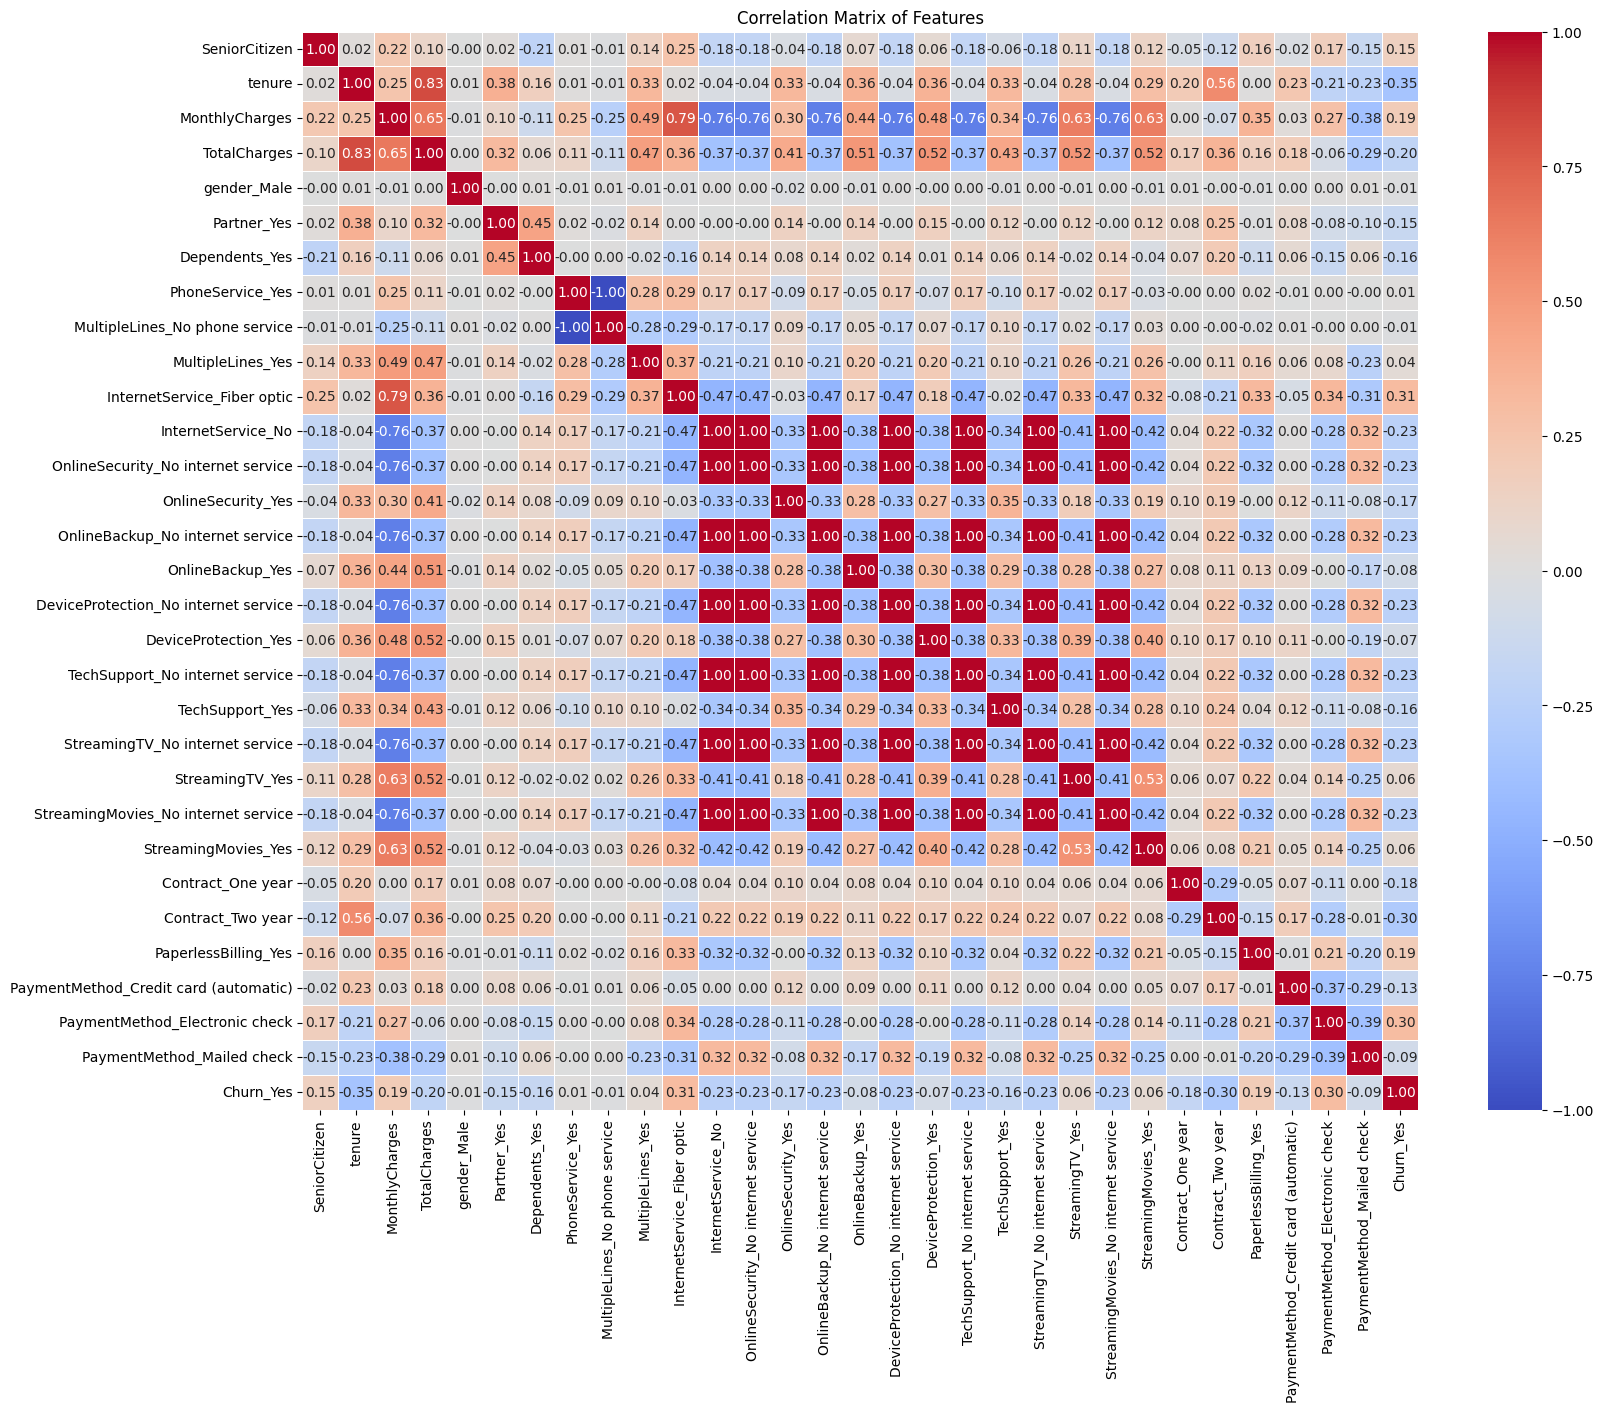

In [106]:
# 숫자형 컬럼만 선택 (원-핫 인코딩된 바이너리 컬럼 포함)
# customerID 컬럼은 상관관계 분석에서 제외합니다.
correlation_df = df.drop('customerID', axis=1)

# 상관 행렬 계산
corr_matrix = correlation_df.corr()

# 히트맵 시각화
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

## 4.시각화

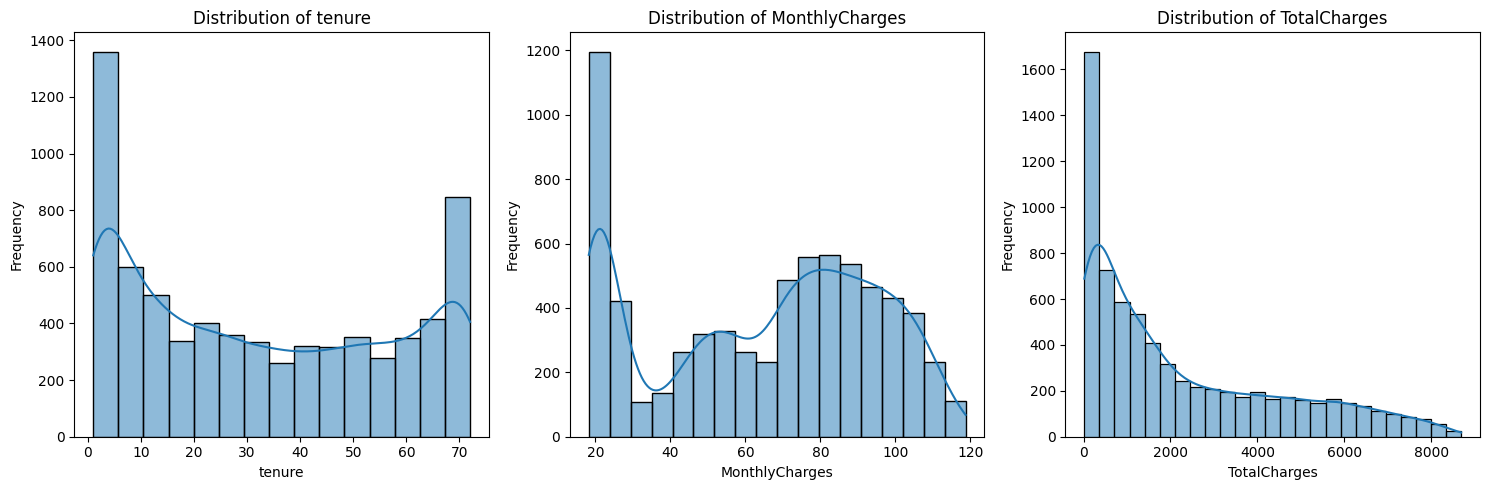

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램 시각화
columns_to_analyze = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))

for i, col in enumerate(columns_to_analyze):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

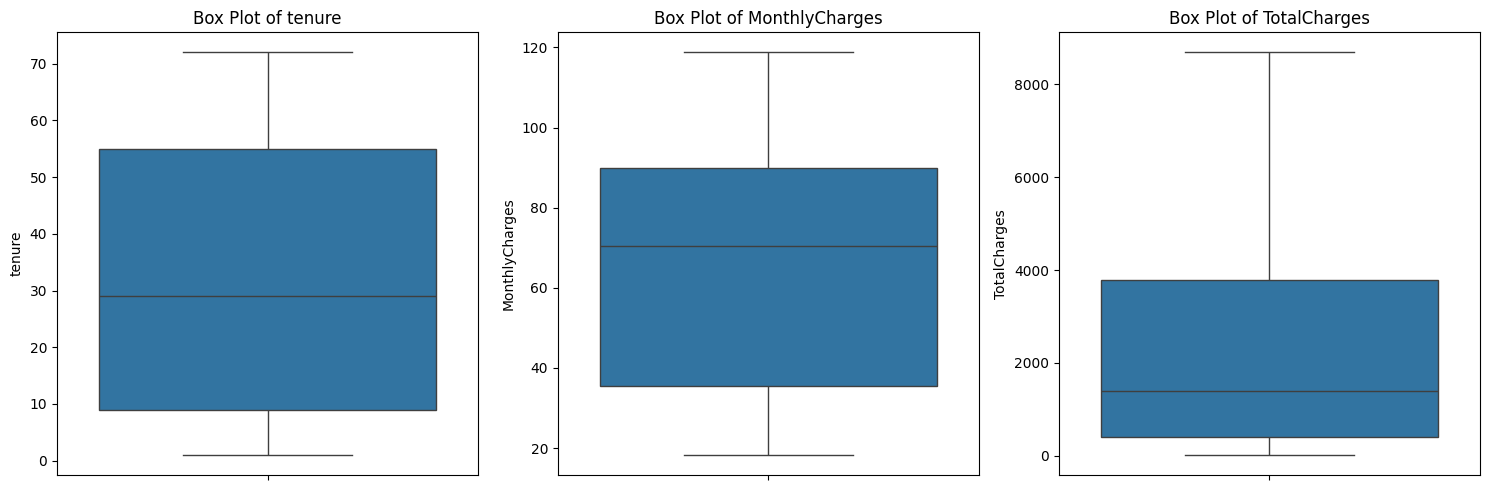

In [102]:
# 박스 플롯 시각화
columns_to_analyze = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))

for i, col in enumerate(columns_to_analyze):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [103]:
# 사분위수 계산 및 출력
columns_to_analyze = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("각 컬럼의 사분위수:")
for col in columns_to_analyze:
    print(f"\n--- {col} ---")
    print(df[col].quantile([0.25, 0.5, 0.75]))

각 컬럼의 사분위수:

--- tenure ---
0.25     9.0
0.50    29.0
0.75    55.0
Name: tenure, dtype: float64

--- MonthlyCharges ---
0.25    35.5875
0.50    70.3500
0.75    89.8625
Name: MonthlyCharges, dtype: float64

--- TotalCharges ---
0.25     401.4500
0.50    1397.4750
0.75    3794.7375
Name: TotalCharges, dtype: float64


## 5.스케일링

In [105]:
from sklearn.preprocessing import StandardScaler

# 스케일링할 숫자형 컬럼 목록
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# StandardScaler 객체 생성
scaler = StandardScaler()

# 숫자형 컬럼에 스케일링 적용
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df[numerical_cols].head())
print("\n스케일링 후 데이터프레임 정보:")
df.info()

     tenure  MonthlyCharges  TotalCharges
0 -1.280248       -1.161694     -0.994194
1  0.064303       -0.260878     -0.173740
2 -1.239504       -0.363923     -0.959649
3  0.512486       -0.747850     -0.195248
4 -1.239504        0.196178     -0.940457

스케일링 후 데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   SeniorCitizen                          7032 non-null   int64  
 2   tenure                                 7032 non-null   float64
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   gender_Male                            7032 non-null   bool   
 6   Partner_Yes                            7032 non-null   bool   
 7   Dependents

In [104]:
# object 타입 컬럼 확인
categorical_cols = df.select_dtypes(include='object').columns
print(f"원본 범주형 컬럼: {list(categorical_cols)}")

# 'customerID' 컬럼은 식별자이므로 인코딩 대상에서 제외
categorical_cols_to_encode = categorical_cols.drop('customerID', errors='ignore')
print(f"인코딩 대상 범주형 컬럼: {list(categorical_cols_to_encode)}")

# 원-핫 인코딩 적용
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

print("\n원-핫 인코딩 후 데이터프레임 정보:")
df_encoded.info()
print("\n원-핫 인코딩 후 데이터프레임 처음 5개 행:")
display(df_encoded.head())

df = df_encoded.copy()

원본 범주형 컬럼: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
인코딩 대상 범주형 컬럼: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

원-핫 인코딩 후 데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   SeniorCitizen                          7032 non-null   int64  
 2   tenure                                 7032 non-null   int64 

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,0,2,53.85,108.15,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
3,7795-CFOCW,0,45,42.30,1840.75,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


## 6.데이터 분할 및 불균형 처리

In [107]:
from sklearn.model_selection import train_test_split

# 피처(X)와 타겟(y) 분리
# 'customerID' 컬럼은 모델 학습에 사용하지 않으므로 제외
# 'Churn_Yes' 컬럼은 타겟 변수이므로 X에서 제외하고 y로 설정
X = df.drop(['customerID', 'Churn_Yes'], axis=1)
y = df['Churn_Yes']

# 학습 세트와 테스트 세트로 분할 (80% 학습, 20% 테스트)
# stratify=y 옵션으로 타겟 변수(y)의 클래스 비율을 유지하며 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("학습 데이터 shape:", X_train.shape)
print("테스트 데이터 shape:", X_test.shape)
print("\n학습 데이터 타겟 변수 분포:")
print(y_train.value_counts(normalize=True))
print("\n테스트 데이터 타겟 변수 분포:")
print(y_test.value_counts(normalize=True))

학습 데이터 shape: (5625, 30)
테스트 데이터 shape: (1407, 30)

학습 데이터 타겟 변수 분포:
Churn_Yes
False    0.734222
True     0.265778
Name: proportion, dtype: float64

테스트 데이터 타겟 변수 분포:
Churn_Yes
False    0.734186
True     0.265814
Name: proportion, dtype: float64


In [108]:
# imblearn 라이브러리 설치
!pip install imbalanced-learn

In [109]:
from imblearn.over_sampling import SMOTE

# SMOTE 객체 생성
# random_state는 결과의 재현성을 위해 설정
smote = SMOTE(random_state=42)

# 학습 데이터에 SMOTE 적용
# X_train_smote와 y_train_smote는 SMOTE가 적용된 새로운 학습 데이터
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("SMOTE 적용 전 학습 데이터 shape:", X_train.shape)
print("SMOTE 적용 후 학습 데이터 shape:", X_train_smote.shape)

print("\nSMOTE 적용 전 학습 데이터 타겟 변수 분포:")
print(y_train.value_counts())

print("\nSMOTE 적용 후 학습 데이터 타겟 변수 분포:")
print(y_train_smote.value_counts())

SMOTE 적용 전 학습 데이터 shape: (5625, 30)
SMOTE 적용 후 학습 데이터 shape: (8260, 30)

SMOTE 적용 전 학습 데이터 타겟 변수 분포:
Churn_Yes
False    4130
True     1495
Name: count, dtype: int64

SMOTE 적용 후 학습 데이터 타겟 변수 분포:
Churn_Yes
False    4130
True     4130
Name: count, dtype: int64


# 7.Task

## 모델 학습

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 1. Logistic Regression 모델 학습
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_smote, y_train_smote)

# 2. Decision Tree 모델 학습
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

# 3. Random Forest 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# 4. XGBoost 모델 학습
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)

# 5. LightGBM 모델 학습
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_smote, y_train_smote)

print("모델 학습 완료.")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:36:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4130, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
모델 학습 완료.


## 모델 예측
학습된 각 모델을 테스트 데이터(`X_test`)에 적용하여 이탈 확률 또는 클래스를 예측


In [111]:
# 1. Logistic Regression 예측
lr_pred = lr_model.predict(X_test)
lr_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# 2. Decision Tree 예측
dt_pred = dt_model.predict(X_test)
dt_pred_proba = dt_model.predict_proba(X_test)[:, 1]

# 3. Random Forest 예측
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# 4. XGBoost 예측
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# 5. LightGBM 예측
lgbm_pred = lgbm_model.predict(X_test)
lgbm_pred_proba = lgbm_model.predict_proba(X_test)[:, 1]

print("테스트 데이터 예측 및 확률 예측 완료.")

테스트 데이터 예측 및 확률 예측 완료.


## 모델 평가
각 모델의 예측 성능을 평가 지표(정확도, 정밀도, 재현율, F1 점수, ROC AUC 등)를 사용하여 비교


--- Evaluating Logistic Regression ---
Accuracy: 0.7441
Precision: 0.5132
Recall: 0.7299
F1-Score: 0.6026
ROC AUC: 0.8210


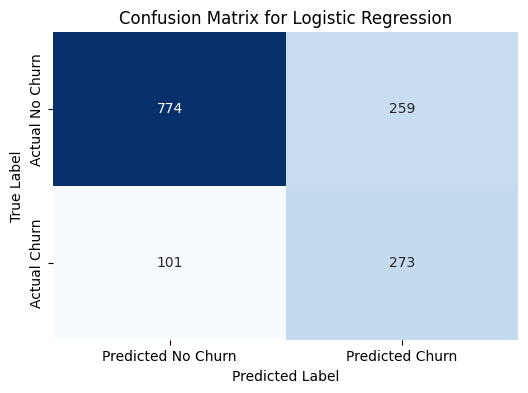

------------------------------
--- Evaluating Decision Tree ---
Accuracy: 0.7235
Precision: 0.4839
Recall: 0.6016
F1-Score: 0.5364
ROC AUC: 0.6846


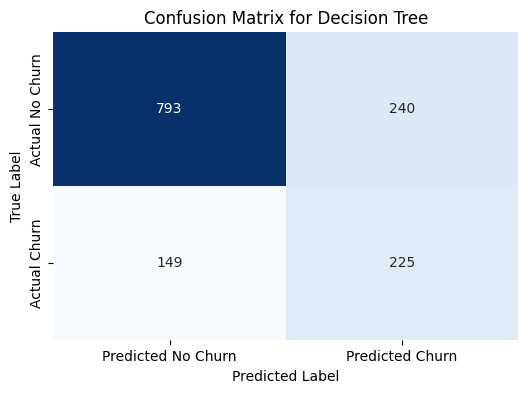

------------------------------
--- Evaluating Random Forest ---
Accuracy: 0.7775
Precision: 0.5718
Recall: 0.6497
F1-Score: 0.6083
ROC AUC: 0.8149


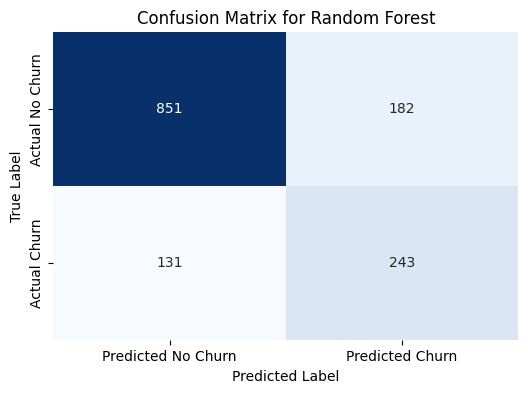

------------------------------
--- Evaluating XGBoost ---
Accuracy: 0.7576
Precision: 0.5361
Recall: 0.6551
F1-Score: 0.5897
ROC AUC: 0.8110


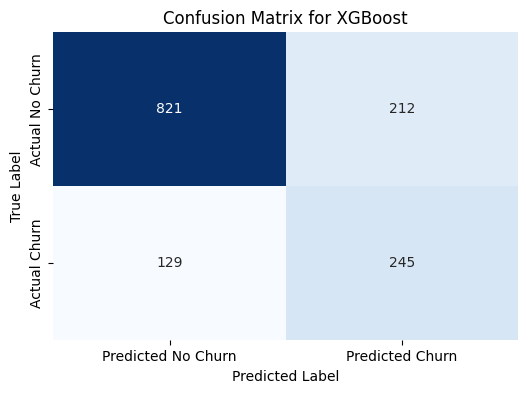

------------------------------
--- Evaluating LightGBM ---
Accuracy: 0.7619
Precision: 0.5405
Recall: 0.6952
F1-Score: 0.6082
ROC AUC: 0.8254


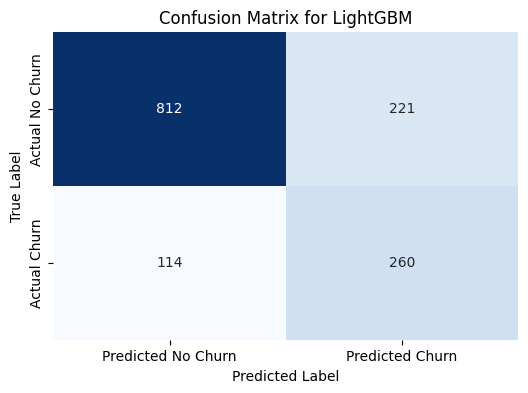

------------------------------

Evaluation complete. Results stored in 'evaluation_results' dictionary.


In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a dictionary to store evaluation results
evaluation_results = {}

models = {
    "Logistic Regression": (lr_pred, lr_pred_proba),
    "Decision Tree": (dt_pred, dt_pred_proba),
    "Random Forest": (rf_pred, rf_pred_proba),
    "XGBoost": (xgb_pred, xgb_pred_proba),
    "LightGBM": (lgbm_pred, lgbm_pred_proba)
}

for model_name, (predictions, probabilities) in models.items():
    print(f"--- Evaluating {model_name} ---")

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, probabilities)
    cm = confusion_matrix(y_test, predictions)

    # Store results
    evaluation_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc,
        "Confusion Matrix": cm
    }

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted No Churn', 'Predicted Churn'],
                yticklabels=['Actual No Churn', 'Actual Churn'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print("-" * 30)

print("\nEvaluation complete. Results stored in 'evaluation_results' dictionary.")

## 결과 비교 및 최적 모델 선택

In [114]:
# 평가 결과를 기반으로 모델 성능 비교
print("--- 모델 성능 비교 ---")

best_model_name = None
best_roc_auc = -1
best_recall = -1

for model_name, metrics in evaluation_results.items():
    print(f"\n{model_name}:")
    print(f"  정확도 (Accuracy): {metrics['Accuracy']:.4f}")
    print(f"  정밀도 (Precision): {metrics['Precision']:.4f}")
    print(f"  재현율 (Recall): {metrics['Recall']:.4f}")
    print(f"  F1-점수 (F1-Score): {metrics['F1-Score']:.4f}")
    print(f"  ROC AUC: {metrics['ROC AUC']:.4f}")

    # 최적 모델 선택을 위해 Recall과 ROC AUC를 우선적으로 고려
    if metrics['ROC AUC'] > best_roc_auc:
        best_roc_auc = metrics['ROC AUC']
        best_model_name = model_name
    elif metrics['ROC AUC'] == best_roc_auc:
        # ROC AUC가 같으면 Recall이 더 높은 모델 선호
        if metrics['Recall'] > best_recall:
            best_recall = metrics['Recall']
            best_model_name = model_name
        elif metrics['Recall'] == best_recall:
            # ROC AUC와 Recall 모두 같으면 F1-score 고려
            if metrics['F1-Score'] > evaluation_results[best_model_name]['F1-Score']:
                best_model_name = model_name


# 최적 성능 모델 출력
print("\n--- 최적 성능 모델 ---")
if best_model_name:
    print(f"ROC AUC와 Recall을 기준으로 가장 좋은 모델은: {best_model_name}")
    print("핵심 지표:")
    for metric, value in evaluation_results[best_model_name].items():
        if metric != 'Confusion Matrix':
            print(f"  {metric}: {value:.4f}")
else:
    print("최적 모델을 결정할 수 없습니다.")

--- 모델 성능 비교 ---

Logistic Regression:
  정확도 (Accuracy): 0.7441
  정밀도 (Precision): 0.5132
  재현율 (Recall): 0.7299
  F1-점수 (F1-Score): 0.6026
  ROC AUC: 0.8210

Decision Tree:
  정확도 (Accuracy): 0.7235
  정밀도 (Precision): 0.4839
  재현율 (Recall): 0.6016
  F1-점수 (F1-Score): 0.5364
  ROC AUC: 0.6846

Random Forest:
  정확도 (Accuracy): 0.7775
  정밀도 (Precision): 0.5718
  재현율 (Recall): 0.6497
  F1-점수 (F1-Score): 0.6083
  ROC AUC: 0.8149

XGBoost:
  정확도 (Accuracy): 0.7576
  정밀도 (Precision): 0.5361
  재현율 (Recall): 0.6551
  F1-점수 (F1-Score): 0.5897
  ROC AUC: 0.8110

LightGBM:
  정확도 (Accuracy): 0.7619
  정밀도 (Precision): 0.5405
  재현율 (Recall): 0.6952
  F1-점수 (F1-Score): 0.6082
  ROC AUC: 0.8254

--- 최적 성능 모델 ---
ROC AUC와 Recall을 기준으로 가장 좋은 모델은: LightGBM
핵심 지표:
  Accuracy: 0.7619
  Precision: 0.5405
  Recall: 0.6952
  F1-Score: 0.6082
  ROC AUC: 0.8254
